In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/solar_data/")

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

The dataset contains measurements of various meteorological parameters over a period of time. The data columns and their respective units are as follows:

- **Timestamp**: Date and time of measurement
- **Temperature**: Degrees Celsius (°C)
- **Dew Point**: Degrees Celsius (°C)
- Surface Albedo: Decimal fraction between 0 and 1
- Pressure: Hectopascals (hPa)
- Wind Direction: Degrees (°)
- Wind Speed: Meters per second (m/s)
- Clearsky DHI: Watts per square meter (W/m²)
- Clearsky DNI: Watts per square meter (W/m²)
- Clearsky GHI: Watts per square meter (W/m²)
- Fill Flag: Binary (0 or 1) indicating if data was missing or not
- Ozone: Dobson Units (DU)
- Cloud Type: Classification scheme (0-9) indicating cloud cover type
- Solar Zenith Angle: Degrees (°)
- Precipitable Water: Millimeters (mm)
- Relative Humidity: Percentage (%)

The dataset is useful for analyzing and predicting weather patterns and conditions. It can be used by researchers, meteorologists, and weather enthusiasts to gain insights into the atmospheric behavior and its impact on the environment.

In [15]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91


### Data Quality Checks

1. **Identification of Missing Values:** The aim is to identify and quantify the amount of missing values present in both the train and test sets.

In [6]:
# Check data types
train.dtypes

Timestamp              object
Temperature           float64
Dew Point             float64
Surface Albedo        float64
Pressure                int64
Wind Direction          int64
Wind Speed            float64
Clearsky DHI            int64
Clearsky DNI            int64
Clearsky GHI            int64
Fill Flag               int64
Ozone                 float64
Cloud Type              int64
Solar Zenith Angle    float64
Precipitable Water    float64
Relative Humidity     float64
dtype: object

In [16]:
train["Timestamp"] = pd.to_datetime(train["Timestamp"])
test["Timestamp"] = pd.to_datetime(test["Timestamp"])

2. **Identification of Missing Values:** The aim is to identify and quantify the amount of missing values present in both the train and test sets.

In [8]:

# Check for missing values
train.isnull().sum(), train.shape

(Timestamp             0
 Temperature           0
 Dew Point             0
 Surface Albedo        0
 Pressure              0
 Wind Direction        0
 Wind Speed            0
 Clearsky DHI          0
 Clearsky DNI          0
 Clearsky GHI          0
 Fill Flag             0
 Ozone                 0
 Cloud Type            0
 Solar Zenith Angle    0
 Precipitable Water    0
 Relative Humidity     0
 dtype: int64,
 (210240, 16))

In [9]:
test.isnull().sum(), test.shape

(Timestamp                 0
 Temperature               0
 Dew Point                 0
 Surface Albedo            0
 Pressure                  0
 Wind Direction            0
 Wind Speed                0
 Clearsky DHI          52560
 Clearsky DNI          52560
 Clearsky GHI          52560
 Fill Flag                 0
 Ozone                     0
 Cloud Type                0
 Solar Zenith Angle        0
 Precipitable Water        0
 Relative Humidity         0
 dtype: int64,
 (52560, 16))

All of the data related to `clearsky` are missing in the test set. These are the target variables. `Clearsky DHI`, `Clearsky DNI`, and `Clearsky GHI` are related to solar radiation measurements, each representing different aspects of the sun's energy as it reaches the Earth's surface. They are all measured in **Watts per square meter (W/m²)**, which is a unit of power density representing the rate of energy transfer per unit area.


### Target Features

Three features effectively capture
- **Clearsky DHI (Diffuse Horizontal Irradiance):** This measures the amount of solar radiation received per unit area by a surface (like the Earth's surface) from the sun without the direct sunlight. It accounts for the sunlight scattered by the atmosphere and reaches the Earth indirectly. DHI is an important component in understanding the total amount of solar energy that a solar panel might receive in partly cloudy or cloudy conditions.

- **Clearsky DNI (Direct Normal Irradiance):** This represents the amount of solar radiation received per unit area by a surface that is always held perpendicular (or normal) to the rays coming directly from the sun. This measurement doesn't include the diffuse solar radiation (the sunlight scattered by the atmosphere). DNI is a crucial factor for understanding the potential of concentrated solar power systems and solar thermal applications, which depend heavily on direct sunlight.

- **Clearsky GHI (Global Horizontal Irradiance):** GHI measures the total amount of shortwave radiation received from above by a horizontal surface. This value includes both the direct sunlight and the diffuse component of sunlight scattered by the atmosphere. GHI is a vital parameter for evaluating the solar energy potential for photovoltaic systems and other solar applications that are placed horizontally or at a fixed tilt.

3. Check statistical summary of dataset.

In [ ]:
# Statistical summary
train.describe()

,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
count,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000
mean,26.795495,13.447805,0.211623,996.856141,209.095453,1.918037,96.720681,225.098992,249.938537,0.288699,0.268813,2.513604,89.745758,3.377582,53.364443
std,8.639162,10.234861,0.020889,7.226820,101.616108,1.194954,120.334380,277.920322,325.049751,1.052178,0.015632,3.093565,42.852632,2.261960,29.692608
min,1.000000,-12.400000,0.170000,978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217000,0.000000,2.210000,0.300000,4.100000
25%,20.800000,4.900000,0.200000,990.000000,109.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.259000,0.000000,53.140000,1.500000,25.540000
50%,27.300000,13.100000,0.200000,997.000000,248.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.270000,1.000000,89.400000,2.500000,51.210000
75%,32.200000,24.400000,0.230000,1003.000000,293.000000,2.500000,194.000000,486.000000,533.000000,0.000000,0.279000,6.000000,126.440000,5.700000,80.820000
max,48.900000,29.100000,0.260000,1013.000000,360.000000,9.500000,603.000000,1008.000000,1053.000000,5.000000,0.351000,9.000000,177.950000,8.900000,100.000000


4. Look for duplicated or repeated data points.

In [ ]:
# Check for duplicate rows
train.duplicated().sum()

0

5. The data is time series. Hence, there is a need to check for consistency in the timeframe during which the data was sampled.

In [ ]:
# Consistency in Time Series
# Converting 'Timestamp' to datetime and checking the interval consistency
data = pd.concat([train,test])
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
time_intervals = data['Timestamp'].diff().value_counts()
time_intervals

0 days 00:10:00    262798
1 days 00:10:00         1
Name: Timestamp, dtype: int64

## Exploratory Data Analysis

### Trend Analysis

The goal here is to analyze trends over time for key variables like **temperature, pressure, and humidity**.



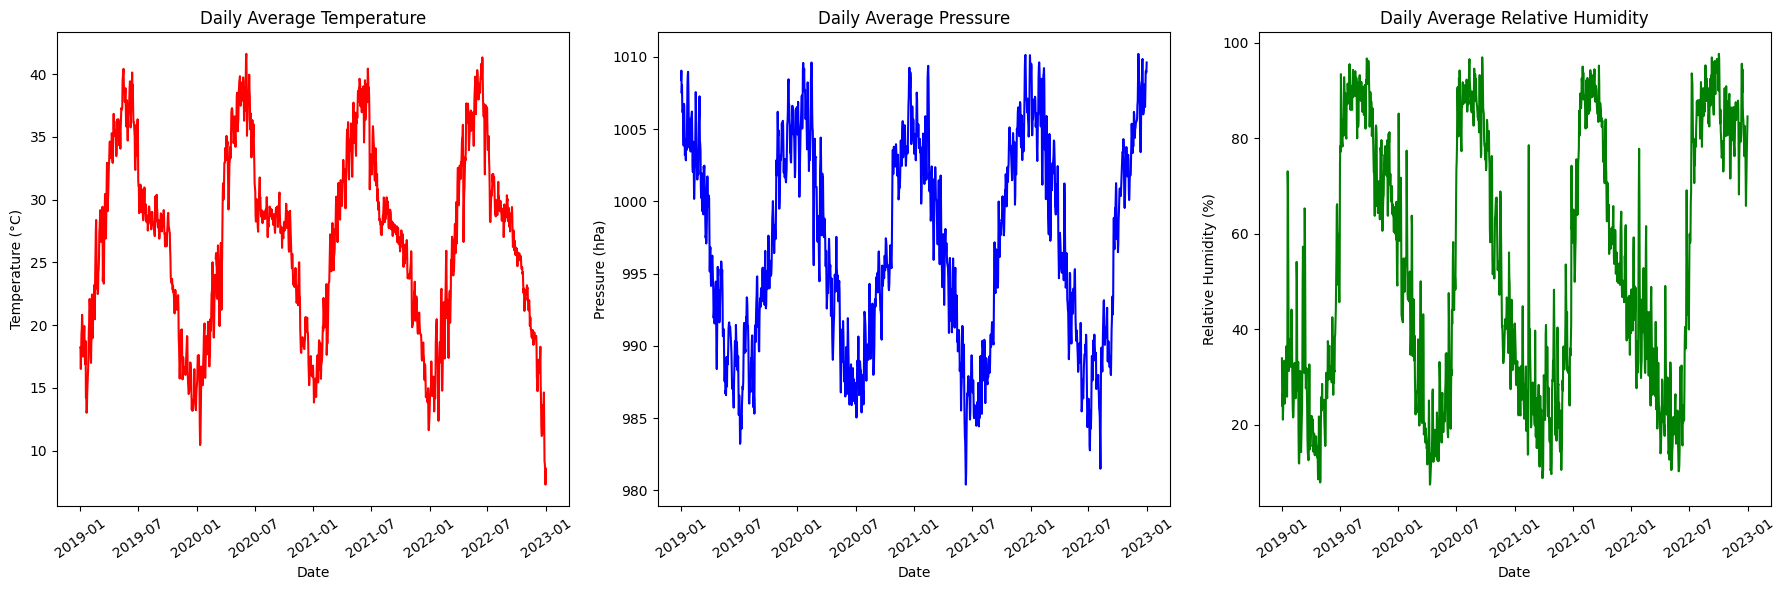

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resample the data to daily averages for trend analysis
daily_data = train.resample('D', on='Timestamp').mean()

# Plotting trends for key variables: Temperature, Pressure, and Relative Humidity
plt.figure(figsize=(18, 6))

# Temperature
plt.subplot(1, 3, 1)
plt.plot(daily_data.index, daily_data['Temperature'], color='red')
plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.xticks(rotation = 35)
plt.ylabel('Temperature (°C)')

# Pressure
plt.subplot(1, 3, 2)
plt.plot(daily_data.index, daily_data['Pressure'], color='blue')
plt.title('Daily Average Pressure')
plt.xlabel('Date')
plt.xticks(rotation = 35)
plt.ylabel('Pressure (hPa)')

# Relative Humidity
plt.subplot(1, 3, 3)
plt.plot(daily_data.index, daily_data['Relative Humidity'], color='green')
plt.title('Daily Average Relative Humidity')
plt.xlabel('Date')
plt.xticks(rotation = 35)
plt.ylabel('Relative Humidity (%)')

plt.tight_layout()
plt.show()


The trend analysis for daily average temperature, pressure, and relative humidity reveals the following:

1. **Temperature:** Shows variability over time, possibly indicating seasonal changes. There might be a pattern of increasing and decreasing temperatures corresponding to different times of the year.

2. **Pressure:** The pressure also fluctuates over time, but without a clear seasonal trend. The variations might be influenced by various atmospheric conditions.

3. **Relative Humidity:** This shows a varying pattern, which could be influenced by both temperature and seasonal changes.

### Seasonal Patterns

The objective here will be to investigate if there are any seasonal patterns, especially in temperature and solar parameters. I will analyze seasonal patterns, particularly focusing on temperature and solar parameters (`Clearsky DHI`, `DNI`, and `GHI`). To visualize, I will create plots to observe how these variables change across different months of the year.


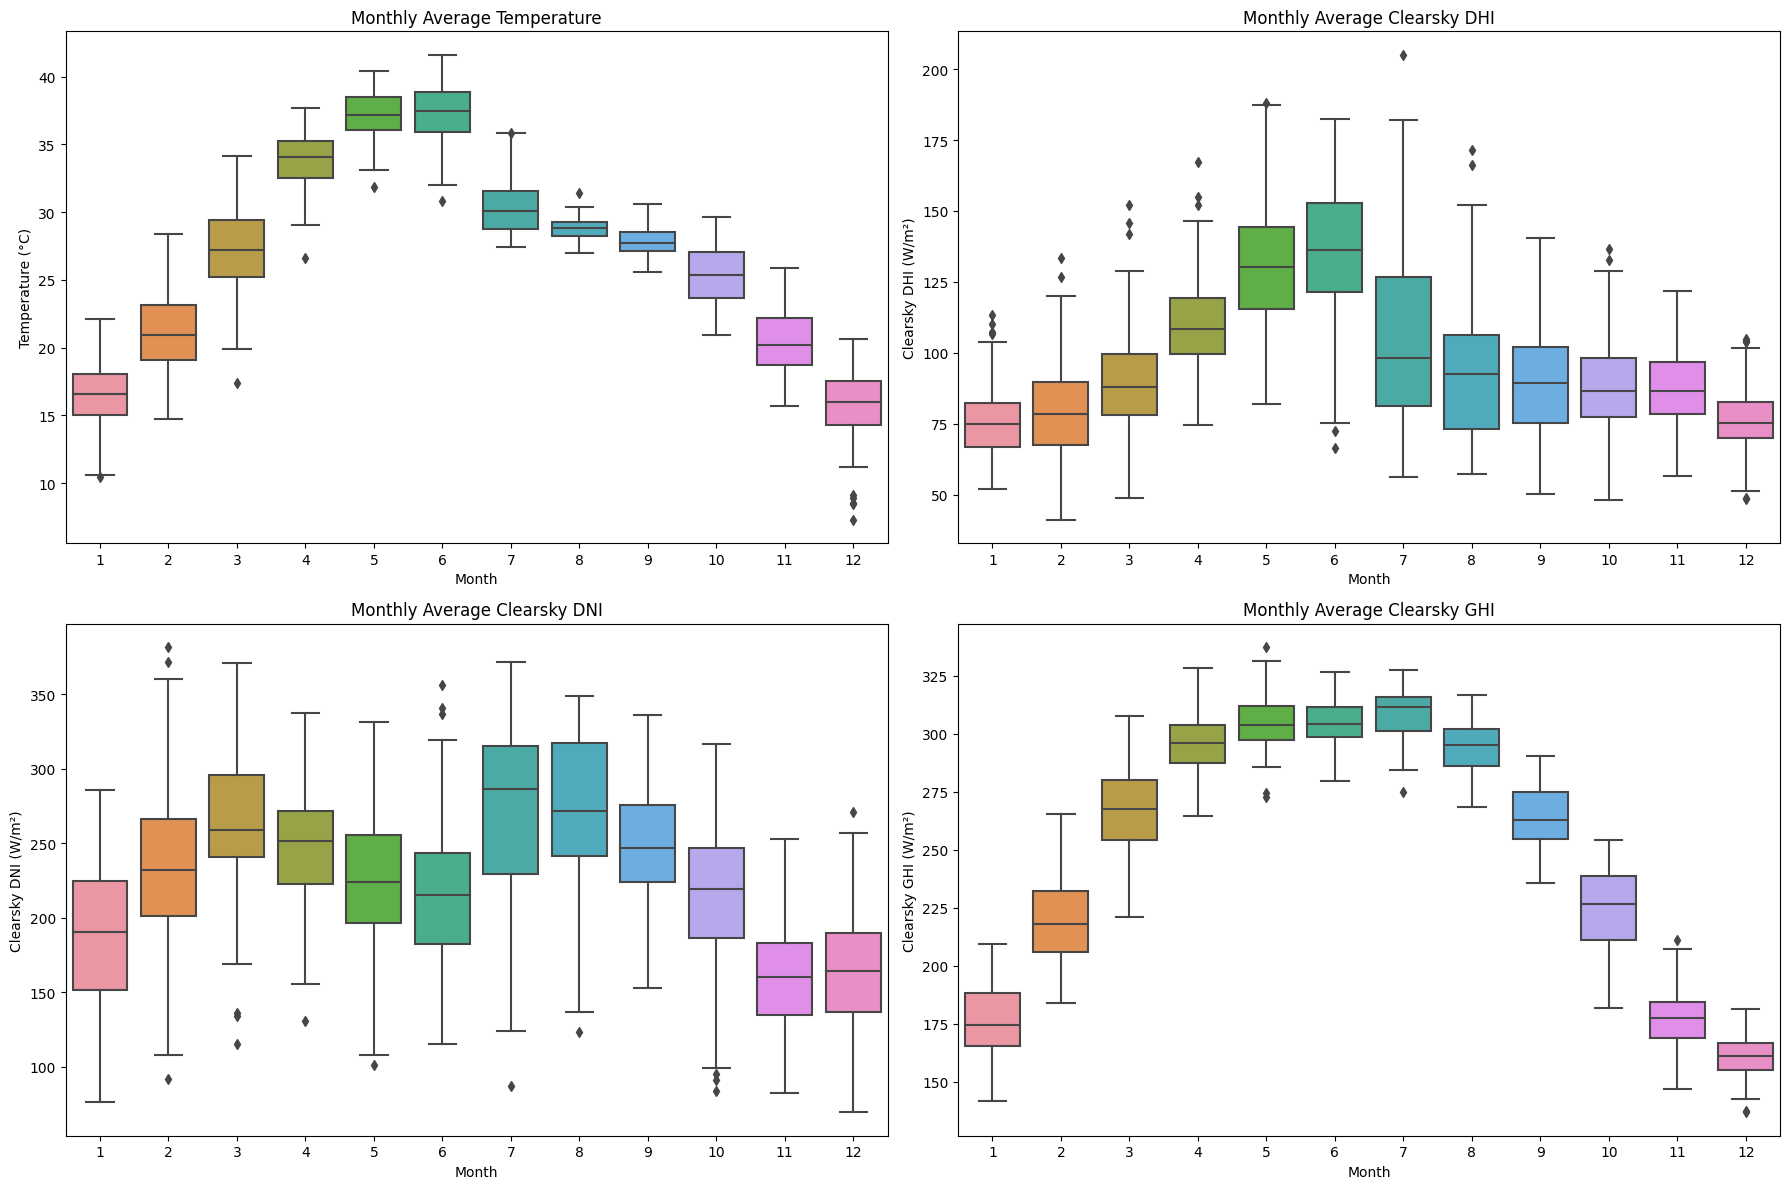

In [ ]:
# Extracting month and year for seasonal analysis
daily_data['Month'] = daily_data.index.month
daily_data['Year'] = daily_data.index.year

# Seasonal pattern analysis for Temperature and Solar Parameters (DHI, DNI, GHI)
plt.figure(figsize=(18, 12))

# Monthly Average Temperature
plt.subplot(2, 2, 1)
sns.boxplot(data=daily_data, x='Month', y='Temperature')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# Monthly Average Clearsky DHI
plt.subplot(2, 2, 2)
sns.boxplot(data=daily_data, x='Month', y='Clearsky DHI')
plt.title('Monthly Average Clearsky DHI')
plt.xlabel('Month')
plt.ylabel('Clearsky DHI (W/m²)')

# Monthly Average Clearsky DNI
plt.subplot(2, 2, 3)
sns.boxplot(data=daily_data, x='Month', y='Clearsky DNI')
plt.title('Monthly Average Clearsky DNI')
plt.xlabel('Month')
plt.ylabel('Clearsky DNI (W/m²)')

# Monthly Average Clearsky GHI
plt.subplot(2, 2, 4)
sns.boxplot(data=daily_data, x='Month', y='Clearsky GHI')
plt.title('Monthly Average Clearsky GHI')
plt.xlabel('Month')
plt.ylabel('Clearsky GHI (W/m²)')

plt.tight_layout()
plt.show()


The seasonal pattern analysis for temperature and solar parameters (Clearsky DHI, DNI, GHI) provides valuable insights:

- **Monthly Average Temperature:** There's a clear seasonal pattern in temperature, with higher temperatures in the middle months (likely summer) and lower temperatures in the starting and ending months likely winter.

- **Monthly Average Clearsky DHI (Diffuse Horizontal Irradiance):** There seems to be variation throughout the year, with some months showing higher values, possibly corresponding to times with more cloud cover or specific sun angles.

- **Monthly Average Clearsky DNI (Direct Normal Irradiance):** Similar to DHI, DNI also varies across months, indicating changes in the direct solar irradiance received at the surface.

- **Monthly Average Clearsky GHI (Global Horizontal Irradiance):** Shows significant variation, reflecting the combined effects of direct sunlight and diffuse sky radiation. Peaks in certain months could correspond to sunnier periods.

### Correlation Analysis

The objective here is to investigate the relationships between different variables, such as temperature and humidity, or solar parameters and cloud type. To achieve this, I will conduct a correlation analysis to understand the relationships between different variables. This will help in identifying which variables are closely related to each other, and may provide insights into underlying meteorological processes.

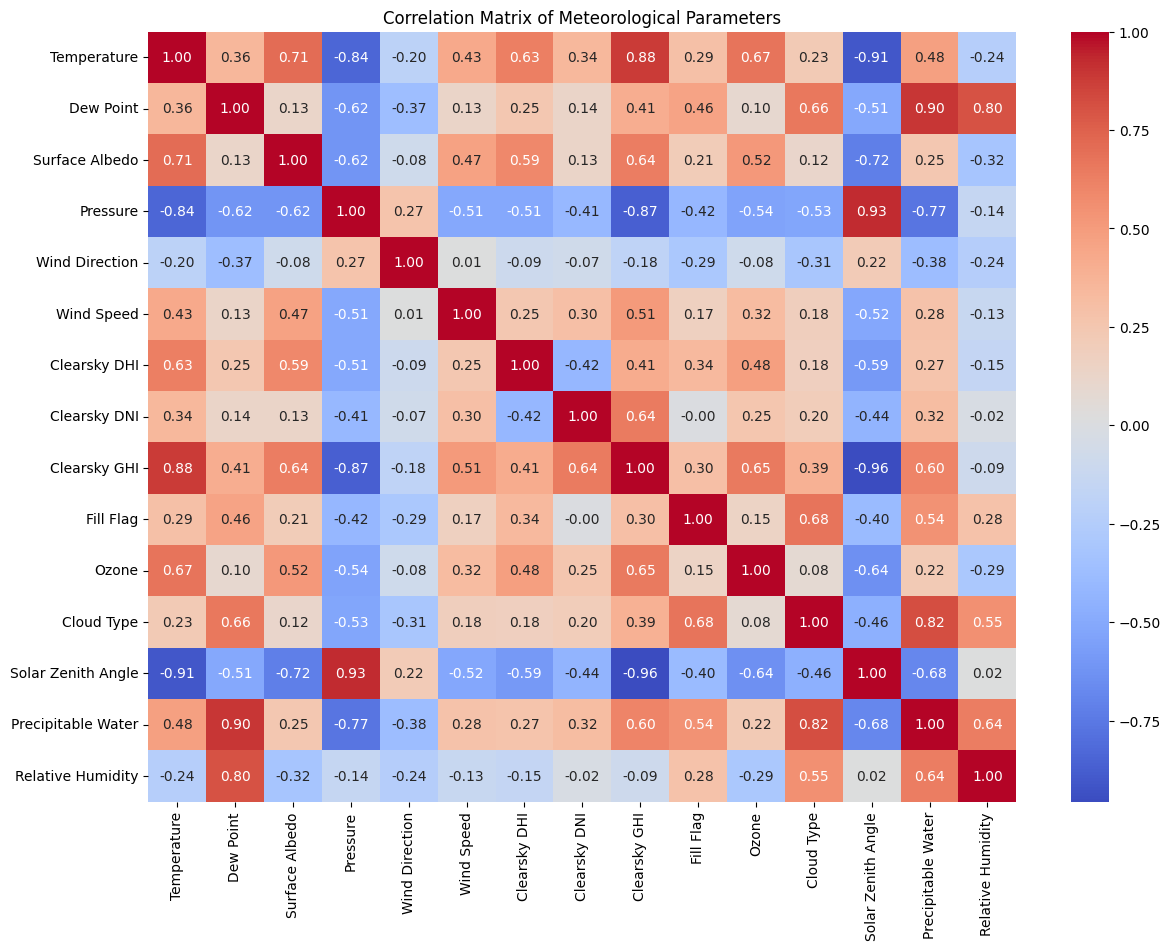

In [ ]:
# Correlation analysis
correlation_matrix = daily_data.drop(columns=['Month', 'Year']).corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Meteorological Parameters')
plt.show()


The correlation matrix for the meteorological parameters reveals several interesting relationships:


1. Temperature shows a strong positive correlation with Clearsky DHI, DNI, and GHI, indicating higher temperatures are associated with higher solar irradiance.
A moderate negative correlation is observed with the Solar Zenith Angle, suggesting higher temperatures when the sun is more directly overhead.

2. Solar Parameters (DHI, DNI, GHI) are strongly correlated with each other, as expected, since they are different measures of solar irradiance.
They also show a strong negative correlation with the Solar Zenith Angle, indicating higher irradiance when the sun is at a lower angle in the sky.

3. Relative Humidity exhibits a moderate negative correlation with temperature, indicating that higher temperatures often coincide with lower humidity levels.

4. Pressure shows very low or negligible correlations with most other parameters, suggesting it's influenced by different atmospheric dynamics.

5. Wind Speed has low correlations with most parameters, though it shows a slight negative correlation with Solar Zenith Angle.

6. Ozone levels show low correlations with most parameters. Cloud type shows a moderate negative correlation with solar parameters, which is logical as more cloud cover would reduce solar irradiance.

### Distribution Analysis

Here, I will analyze the distributions of key variables to understand their spread and central tendencies. The focus will be on **temperature, pressure, relative humidity, and wind speed**.

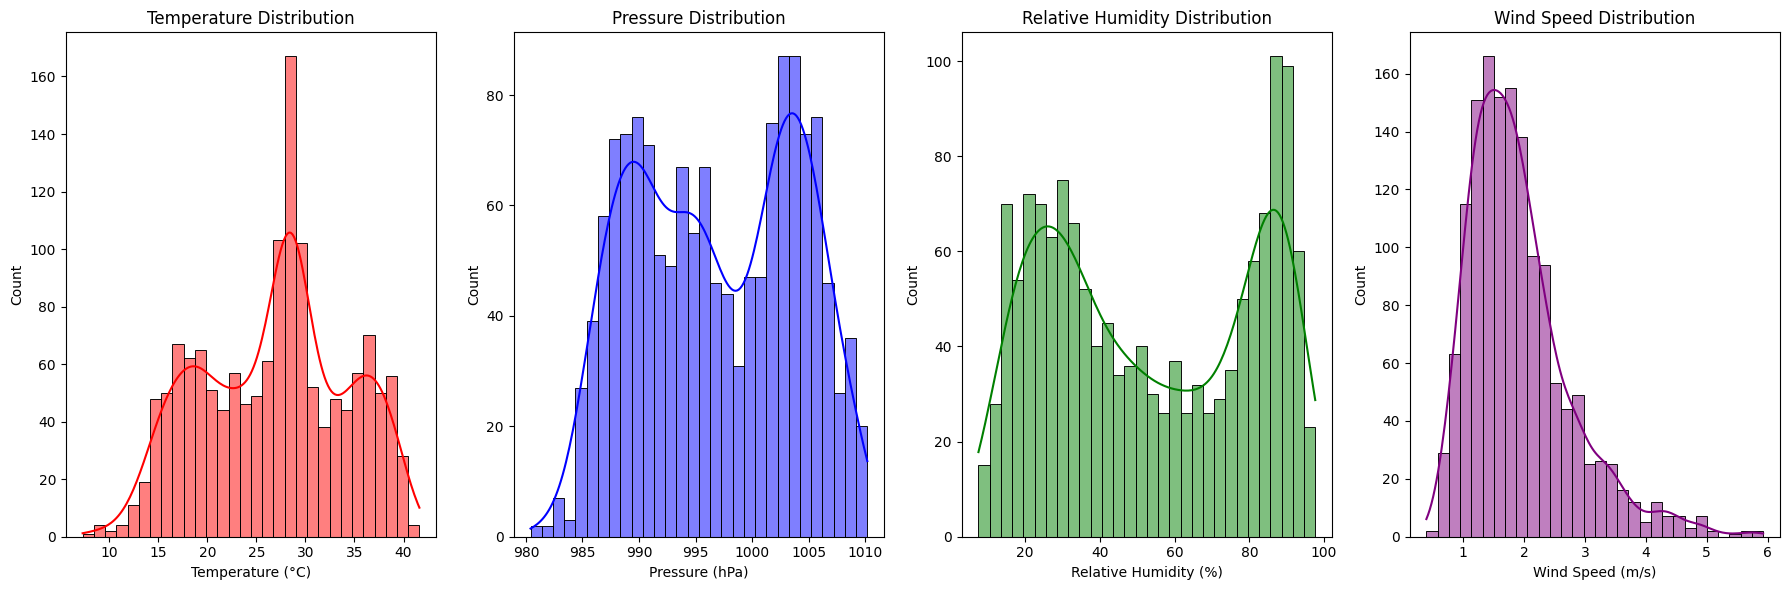

In [ ]:
# Distribution analysis for key variables: Temperature, Pressure, Relative Humidity, Wind Speed
plt.figure(figsize=(18, 6))

# Temperature Distribution
plt.subplot(1, 4, 1)
sns.histplot(daily_data['Temperature'], bins=30, kde=True, color='red')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')

# Pressure Distribution
plt.subplot(1, 4, 2)
sns.histplot(daily_data['Pressure'], bins=30, kde=True, color='blue')
plt.title('Pressure Distribution')
plt.xlabel('Pressure (hPa)')

# Relative Humidity Distribution
plt.subplot(1, 4, 3)
sns.histplot(daily_data['Relative Humidity'], bins=30, kde=True, color='green')
plt.title('Relative Humidity Distribution')
plt.xlabel('Relative Humidity (%)')

# Wind Speed Distribution
plt.subplot(1, 4, 4)
sns.histplot(daily_data['Wind Speed'], bins=30, kde=True, color='purple')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (m/s)')

plt.tight_layout()
plt.show()


The distribution analysis of key variables reveals their spread and central tendencies:

- Temperature distribution shows a unimodal distribution, indicating a common range where most temperature values fall. The distribution is somewhat skewed to the right, suggesting occasional higher temperature extremes.
- Pressure distribution appears to be normally distributed with a clear central peak. This indicates a consistent range of atmospheric pressure values over the period.
- Relative humidity distribution exhibits a broad spread, indicating significant variability in humidity levels. There's a slight skew towards higher humidity levels.
- Wind speed distribution shows a right-skewed distribution, common for wind speed data. Most values are low, with fewer instances of high wind speeds.

### Day vs. Night Analysis

The goal here is to conduct analysis by categorizing the data into day and night segments based on the **Solar Zenith Angle** to understand diurnal variations. I will consider a data point as `day` when the Solar Zenith Angle is less than **90 degrees (sun above the horizon)** and `night` when *it's more*. This analysis will help in understanding the diurnal variations in the meteorological parameters.

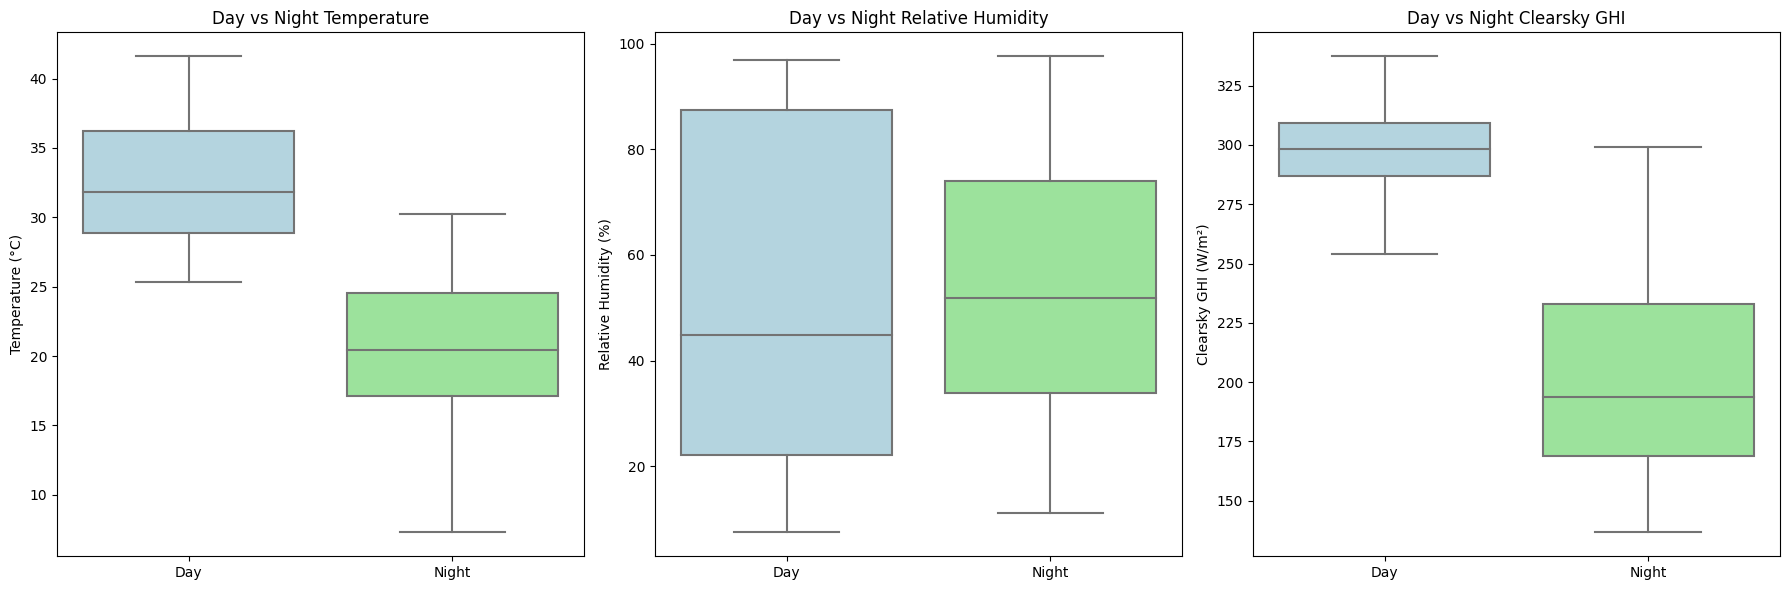

In [ ]:
# Categorizing data into day and night
day_data = daily_data[daily_data['Solar Zenith Angle'] < 90]
night_data = daily_data[daily_data['Solar Zenith Angle'] >= 90]

# Comparing key parameters: Temperature, Relative Humidity, and Clearsky GHI for day and night
plt.figure(figsize=(18, 6))

# Day vs Night - Temperature
plt.subplot(1, 3, 1)
sns.boxplot(data=[day_data['Temperature'], night_data['Temperature']],
            showfliers=False, palette=['lightblue', 'lightgreen'])
plt.xticks([0, 1], ['Day', 'Night'])
plt.title('Day vs Night Temperature')
plt.ylabel('Temperature (°C)')

# Day vs Night - Relative Humidity
plt.subplot(1, 3, 2)
sns.boxplot(data=[day_data['Relative Humidity'], night_data['Relative Humidity']],
            showfliers=False, palette=['lightblue', 'lightgreen'])
plt.xticks([0, 1], ['Day', 'Night'])
plt.title('Day vs Night Relative Humidity')
plt.ylabel('Relative Humidity (%)')

# Day vs Night - Clearsky GHI
plt.subplot(1, 3, 3)
sns.boxplot(data=[day_data['Clearsky GHI'], night_data['Clearsky GHI']],
            showfliers=False, palette=['lightblue', 'lightgreen'])
plt.xticks([0, 1], ['Day', 'Night'])
plt.title('Day vs Night Clearsky GHI')
plt.ylabel('Clearsky GHI (W/m²)')

plt.tight_layout()
plt.show()


The Day vs. Night analysis for temperature, relative humidity, and Clearsky GHI provides insights into diurnal variations:

1. **Temperature**

  - Higher temperatures are observed during the day, as expected, due to solar heating.
  - Nighttime temperatures are consistently lower, reflecting the lack of solar radiation.

2. **Relative Humidity**

  - Shows higher levels during the night, which is common due to lower temperatures causing the air to hold less moisture.
  - Daytime humidity is lower, likely due to increased temperatures and possibly more wind.

3. **Clearsky GHI (Global Horizontal Irradiance)**

  - As expected, GHI values are only significant during the day, as this parameter measures solar irradiance.
  - Nighttime values are close to zero, indicating the absence of direct solar radiation.

### Wind Analysis

Now, I will explore the wind related feature(s) with a focus on wind speed and wind direction patterns. The objective is to check if the distribution of wind speed varies and to examine if there are predominant wind directions.

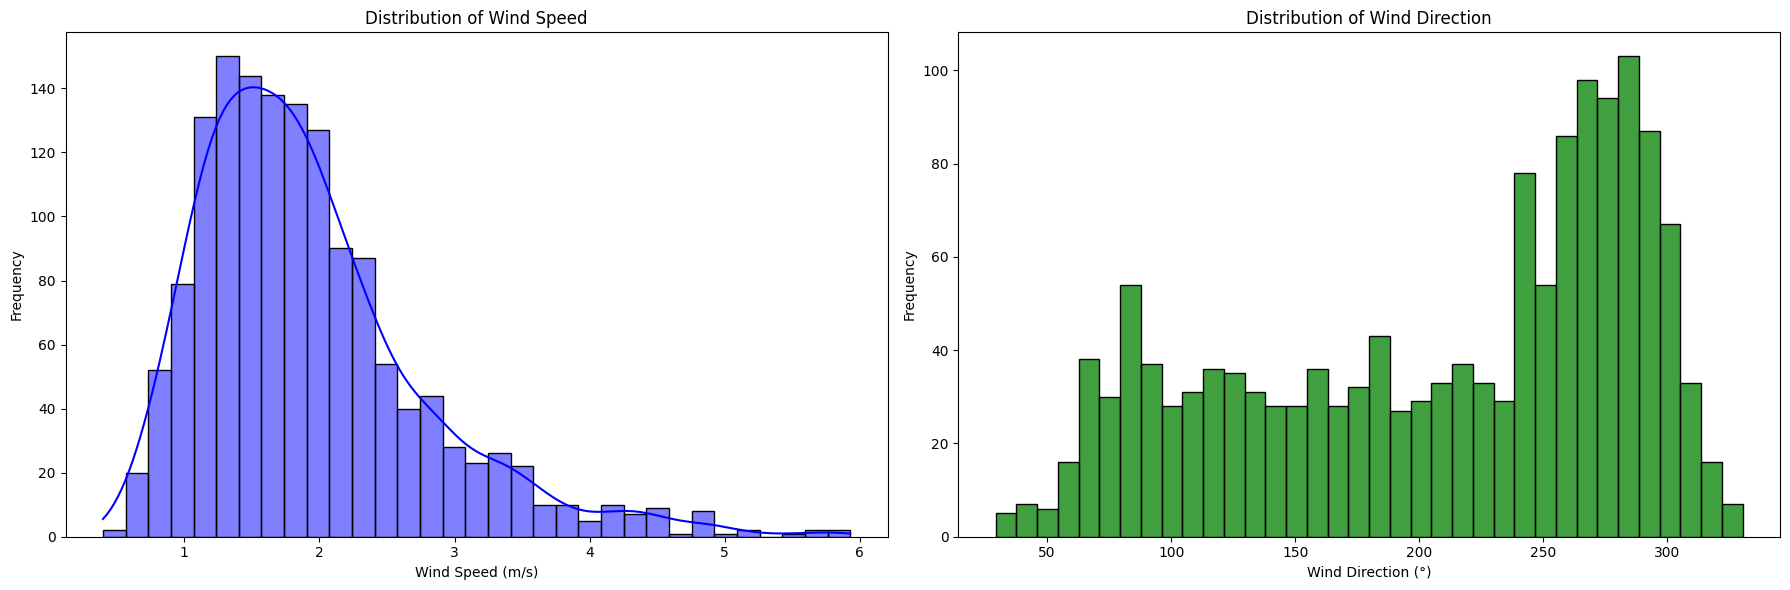

In [ ]:
# Wind analysis: Wind Speed and Wind Direction
plt.figure(figsize=(18, 6))

# Wind Speed Distribution
plt.subplot(1, 2, 1)
sns.histplot(daily_data['Wind Speed'], kde=True, color='blue')
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

# Wind Direction Distribution
plt.subplot(1, 2, 2)
sns.histplot(daily_data['Wind Direction'], bins=36, color='green') # 36 bins for 360 degrees
plt.title('Distribution of Wind Direction')
plt.xlabel('Wind Direction (°)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Key Insights:
- **Wind Speed:** The distribution of wind speed is skewed towards lower speeds, with a peak at lower values. This indicates that lower wind speeds are more common, with occasional higher wind speed events.

- **Wind Direction:** The distribution of wind direction is relatively uniform, though there are some peaks suggesting certain directions are more common. The data is spread across the full range of 360 degrees, indicating variability in wind direction.


### Cloud Type Analysis

In this analysis, the focus is on understanding the distribution of different cloud types in the dataset and exploring their relationships with other meteorological variables. Cloud types in the dataset are classified using a scheme from 0 to 9. The goal here is to:
- **Distribution of Cloud Types:** Identify the most and least common cloud types.
- **Cloud Type vs. Solar Parameters:** Investigate how different cloud types affect solar radiation parameters (Clearsky DHI, DNI, GHI).
- **Cloud Type vs. Weather Conditions:** Explore relationships between cloud types and other weather conditions like temperature and humidity.

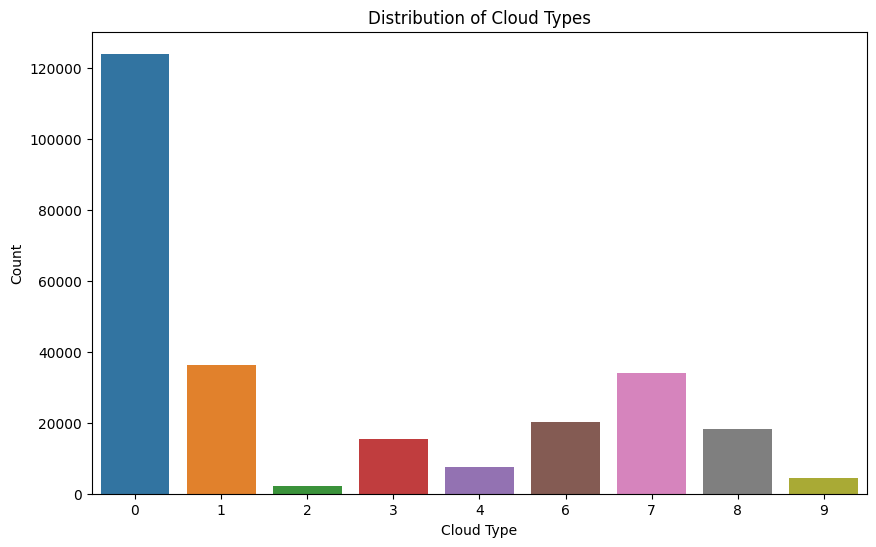

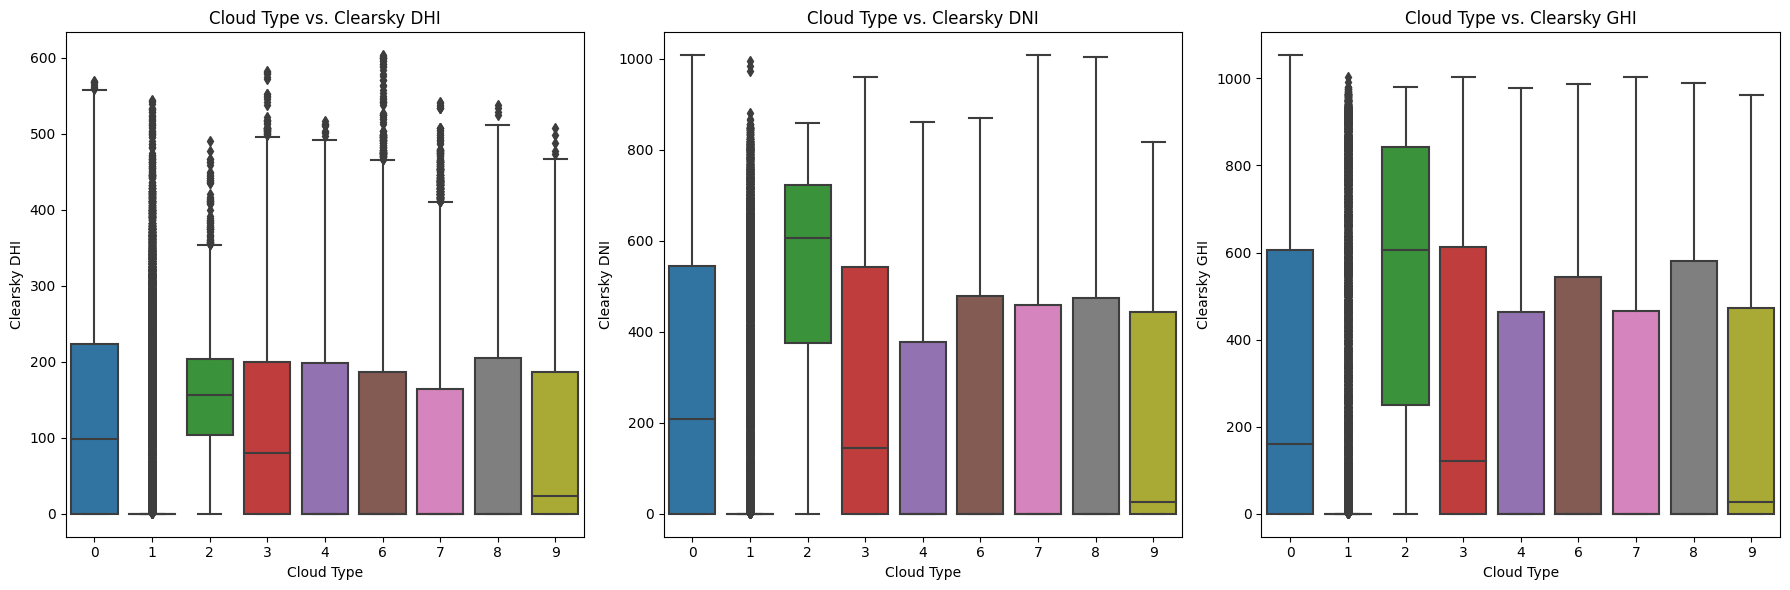

In [ ]:
# Cloud Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Cloud Type')
plt.title('Distribution of Cloud Types')
plt.xlabel('Cloud Type')
plt.ylabel('Count')
plt.show()

# Analyzing the impact of Cloud Type on Solar Parameters
solar_parameters = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']

plt.figure(figsize=(18, 6))
for i, param in enumerate(solar_parameters, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x='Cloud Type', y=param)
    plt.title(f'Cloud Type vs. {param}')
    plt.xlabel('Cloud Type')
    plt.ylabel(param)

plt.tight_layout()
plt.show()


The analysis provides the following insights into cloud types and their impact on meteorological parameters:

1. **Distribution of Cloud Types:** Certain cloud types are more frequent in the dataset, indicating their prevalence in the observed weather conditions.
Some types are less common, which could be due to the specific climatic region or period of the dataset.
2. **Cloud Type vs. Solar Parameters:** The impact of different cloud types on solar radiation parameters (Clearsky DHI, DNI, GHI) varies significantly.
Certain cloud types are associated with lower values of solar parameters, likely due to their density or coverage affecting sunlight penetration.
Some cloud types allow higher solar radiation, which might be less dense or occur in conditions with clearer skies.

## Data Preprocessing


In [17]:
def create_new_features(data):
    # Time-Based Features
    data['Hour'] = data['Timestamp'].dt.hour
    data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
    data['Month'] = data['Timestamp'].dt.month
    data['Season'] = data['Month'].apply(lambda x: (x%12 + 3)//3)

    # Rolling Window Statistics (example: 3-day rolling mean of temperature)
    data['Temperature_RollingMean_3day'] = data['Temperature'].rolling(window=3).mean()

    # Interaction Terms
    data['Temp_Humidity_Interaction'] = data['Temperature'] * data['Relative Humidity']

    # Trigonometric Features for Cyclical Nature (example: hour of the day)
    data['Hour_Sin'] = np.sin(data['Hour']*(2.*np.pi/24))
    data['Hour_Cos'] = np.cos(data['Hour']*(2.*np.pi/24))

    # Dropping the first few rows that now contain NaN values due to lagging and rolling means
    data['Temperature_RollingMean_3day'].iloc[:2] = data["Temperature"].iloc[:2]

    # Function to calculate the Dew Point

    return data

train_data = create_new_features(train)
test_data = create_new_features(test)

<ipython-input-17-4220b8eef833>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Temperature_RollingMean_3day'].iloc[:2] = data["Temperature"].iloc[:2]
<ipython-input-17-4220b8eef833>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Temperature_RollingMean_3day'].iloc[:2] = data["Temperature"].iloc[:2]


In [18]:
columns_to_remove = ['Temperature',"Hour","Fill Flag"]
target_columns = ['Clearsky DHI', 'Clearsky DNI','Clearsky GHI']

# targets
targets = train_data[target_columns]
train_data.set_index('Timestamp', inplace=True)
train_data.sort_index(inplace=True)

# Drop targets and unwanted features
train_inputs = train_data.drop(columns_to_remove+target_columns,axis=1)
test_inputs = test_data.drop(columns_to_remove+target_columns,axis=1)

### Multi-target Regression: Clearsky DHI, DNI and GHI Prediction

Multi-target regression, also known as multivariate or multi-output regression, involves predicting several continuous target variables simultaneously using the same input variables. This approach is particularly relevant in various industrial and environmental contexts, including ecological modeling and energy forecasting. Key applications of multi-target regression include **energy-related forecasting, such as predicting both wind and solar energy production, as well as forecasting energy demand and prices.**

In order to predict global horizontal irradiance, diffuse horizontal irradiance and direct normal irradiance, I decided to employ a multi-target regression strategy.

In [12]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


### Hyper-parameter tuning using hyper-opt (Bayesian Optimization)

In [ ]:
from catboost import CatBoostRegressor
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error



# Define the space of hyperparameters to search
space = {
    'depth': hp.choice('depth', [5, 6, 8]),
    'iterations': hp.choice('iterations', [6000, 7000, 8500]),
    "l2_leaf_reg": hp.choice('l2_leaf_reg', [0.1, 1, 5, 10]),
}

# Objective function to minimize
def objective(params):
    model = CatBoostRegressor(**params, loss_function ='MultiRMSE', task_type="GPU",bootstrap_type='Bernoulli',boosting_type='Plain',learning_rate=0.1,
                            eval_metric='MultiRMSE',verbose=0,random_state=56)
    tscv = TimeSeriesSplit(n_splits=5)
    mse_scores = []

    for train_index, test_index in tscv.split(train_inputs):
        X_train, X_test = train_inputs.iloc[train_index], train_inputs.iloc[test_index]
        y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]

        model.fit(X_train, y_train,early_stopping_rounds=200)
        preds = model.predict(X_test)
        mse_scores.append(mean_squared_error(y_test, preds))

    mse = np.mean(mse_scores)
    return {'loss': mse, 'status': STATUS_OK}

# Run the algorithm
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best: ", best)


 50%|█████     | 25/50 [3:05:53<4:21:52, 628.48s/trial, best loss: 2297.522705685029]

### Best Parameters - Training and Inference

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

#split data
x_train, x_test, y_train, y_test = train_test_split(train_inputs, targets, test_size=0.2, random_state=42)

# Define the actual hyperparameter values corresponding to the search space
depth_choices = [5, 6, 8, 10]
iterations_choices = [6000, 7000, 8500]
l2_leaf_reg_choices = [0.1, 1, 5, 10]

# Map the indices back to the actual values
best_params = {
    'depth': depth_choices[best['depth']],
    'l2_leaf_reg': l2_leaf_reg_choices[best['l2_leaf_reg']],
    'iterations': iterations_choices[best['iterations']]
}

# Reinitialize the CatBoost model with the best parameters
model_ = CatBoostRegressor(**best_params,loss_function ='MultiRMSE', task_type="GPU",
                            eval_metric='MultiRMSE',random_state=56)

# Evaluation
predicted_train = model_.predict(x_train)
predicted = model_.predict(x_test)
mse_train = mean_squared_error(y_train, predicted_train)
mse = mean_squared_error(y_test, predicted)
mae_train = mean_absolute_error(y_train, predicted_train)
mae = mean_absolute_error(y_test, predicted)

R2 = r2_score(y_test, predicted)

print(f'Train Mean Absolute Error: {mae_train}',f'Mean Absolute Error: {mae}')
print(f'Train Mean Squared Error: {mse_train}',f'Mean Squared Error: {mse}')
print(f'Test R2 score: {R2}')

0:	learn: 402.5951703	test: 403.2273066	best: 403.2273066 (0)	total: 55.8ms	remaining: 15m 48s
500:	learn: 46.3978869	test: 48.2165651	best: 48.2165651 (500)	total: 35.5s	remaining: 19m 27s
1000:	learn: 37.5116533	test: 39.8370943	best: 39.8370943 (1000)	total: 1m 10s	remaining: 18m 45s
1500:	learn: 32.0635595	test: 34.8152232	best: 34.8152232 (1500)	total: 1m 45s	remaining: 18m 11s
2000:	learn: 28.2600251	test: 31.3400725	best: 31.3400725 (2000)	total: 2m 16s	remaining: 17m 5s
2500:	learn: 25.3931669	test: 28.7881661	best: 28.7881661 (2500)	total: 2m 48s	remaining: 16m 17s
3000:	learn: 23.0862314	test: 26.7204318	best: 26.7204318 (3000)	total: 3m 22s	remaining: 15m 45s
3500:	learn: 21.3140440	test: 25.1275105	best: 25.1275105 (3500)	total: 3m 54s	remaining: 15m 3s
4000:	learn: 19.8453776	test: 23.8276310	best: 23.8276310 (4000)	total: 4m 25s	remaining: 14m 23s
4500:	learn: 18.6048025	test: 22.7719411	best: 22.7719411 (4500)	total: 4m 57s	remaining: 13m 45s
5000:	learn: 17.5238116	test

#### Make Prediction on Test set

In [ ]:
prediction_file = pd.read_csv("submission.csv")
pred_ = model_.predict(test_inputs)
prediction_file['Clearsky DHI'] = pred_[:,0]
prediction_file['Clearsky DNI'] = pred_[:,1]
prediction_file['Clearsky GHI'] = pred_[:,2]

prediction_file.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0.281677,0.718624,0.470107
1,0.061243,1.290845,0.538919
2,0.061243,1.290845,0.538919
3,0.121328,0.918295,0.419716
4,0.441778,0.347442,0.282391


In [ ]:
prediction_file.to_csv("predict4.csv",index=False)

#### Store Model and weights.

In [ ]:
import joblib
filename = 'catboost_model-v0.1.0.pkl'
joblib.dump(model_, filename)

['catboost_model-v0.1.0.pkl']